In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Job_Listing_Dec2024.csv')

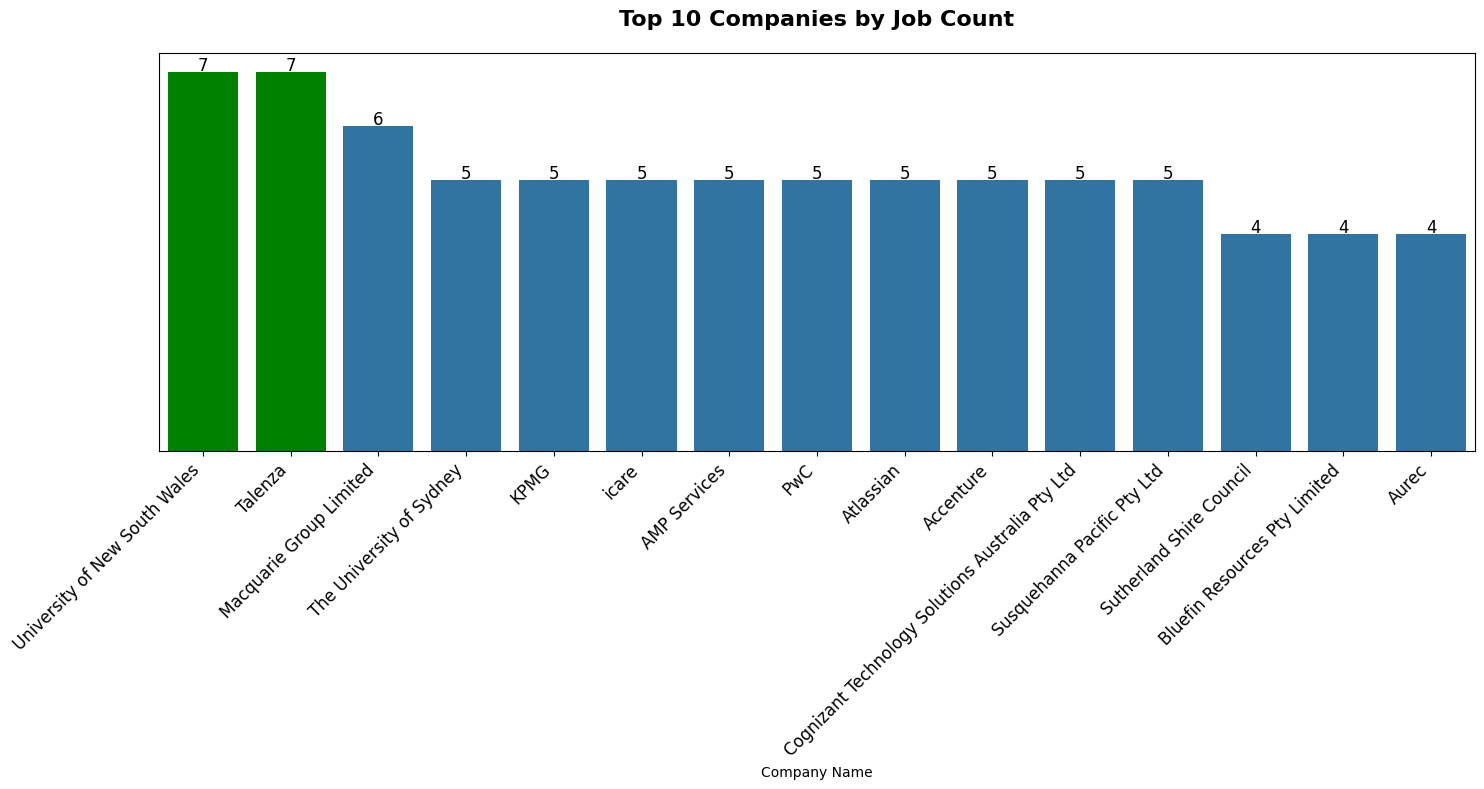

In [7]:
com = df.groupby('Company Name').size().reset_index(name='Company Count')
com = com.sort_values(by='Company Count', ascending=False).head(15)

# Create the plot
plt.figure(figsize=(15, 8))  # Increase figure size to make room for the labels
ax = sns.barplot(x='Company Name', y='Company Count', data=com)

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Display the height of the bar
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning the label
                ha='center', va='center',  # Aligning the label
                fontsize=12, color='black',  # Font size and color
                xytext=(0, 5), textcoords='offset points')  # Adjust the position a bit above the bar

# Highlight the highest bar by finding the bar with the max height
max_height = max(p.get_height() for p in ax.patches)
for p in ax.patches:
    if p.get_height() == max_height:
        p.set_facecolor('green')  # Set color of highest bar to green

# Set title and labels
plt.title("Top 10 Companies by Job Count", fontsize=16, weight='bold', pad=20)  # Adjusted pad value
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels more (45 degrees) and align to the right

# Remove y-axis
ax.get_yaxis().set_visible(False)

# Adjust layout to prevent clipping and ensure enough space for the title and labels
plt.tight_layout()  # Automatically adjusts subplots to fit the figure area
# Alternatively, use plt.subplots_adjust(bottom=0.2) for manual control over the bottom space

# Display the plot
plt.show()


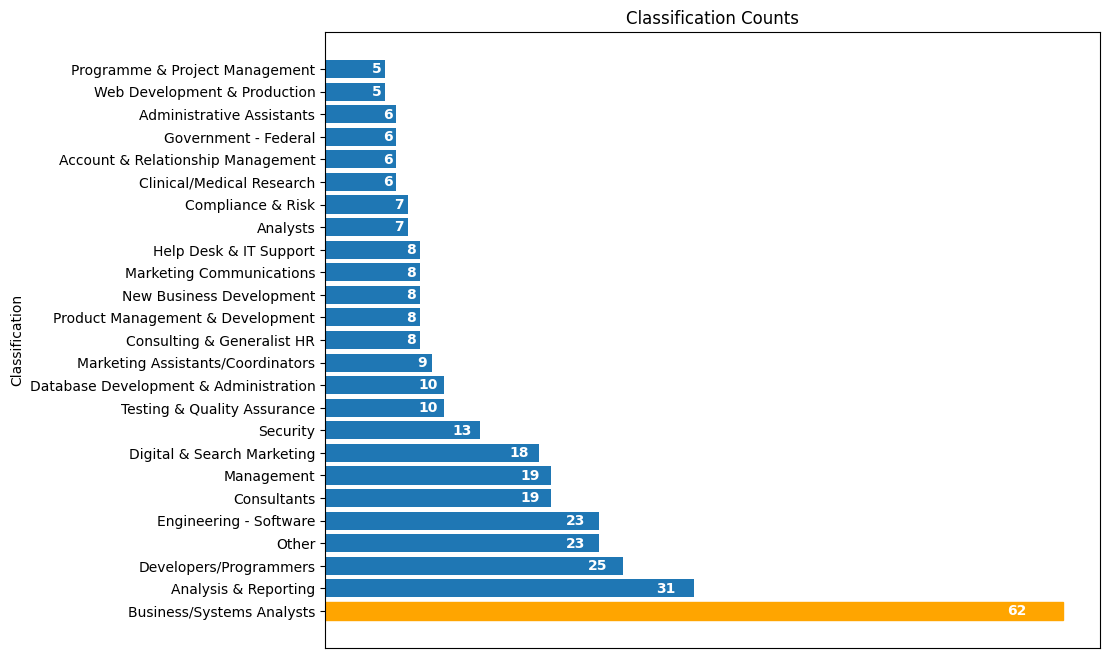

In [11]:
class_group = df.groupby('Classification').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(25)

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the bar chart and capture the returned "bars" object
bars = plt.barh(y=class_group['Classification'], width=class_group['Count'])

# Highlight the maximum count
max_count = class_group['Count'].max()
max_classification = class_group[class_group['Count'] == max_count]['Classification'].values[0]

# Change the color of the bar with the max count to orange
for bar in bars:
    if bar.get_width() == max_count:
        bar.set_color('orange')  # Change the color of the bar with max count

# Add labels inside the bars
for bar in bars:
    plt.text(bar.get_width() - (bar.get_width() * 0.05), bar.get_y() + bar.get_height() / 2,
             str(int(bar.get_width())), va='center', ha='right', color='white', fontweight='bold')

# Hide the x-axis (count axis)
plt.gca().get_xaxis().set_visible(False)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Classification')
plt.title('Classification Counts')

# Show the plot
plt.show()


<Axes: >

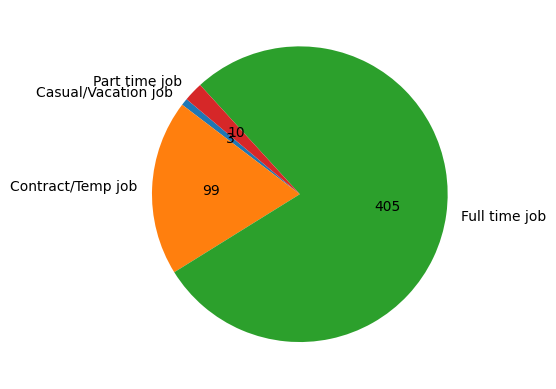

In [12]:
job_type = df.groupby('Job Type').size()

job_type.plot(kind='pie', labels=job_type.index, autopct=lambda p: f'{int(p * job_type.sum() / 100)}', startangle=140)


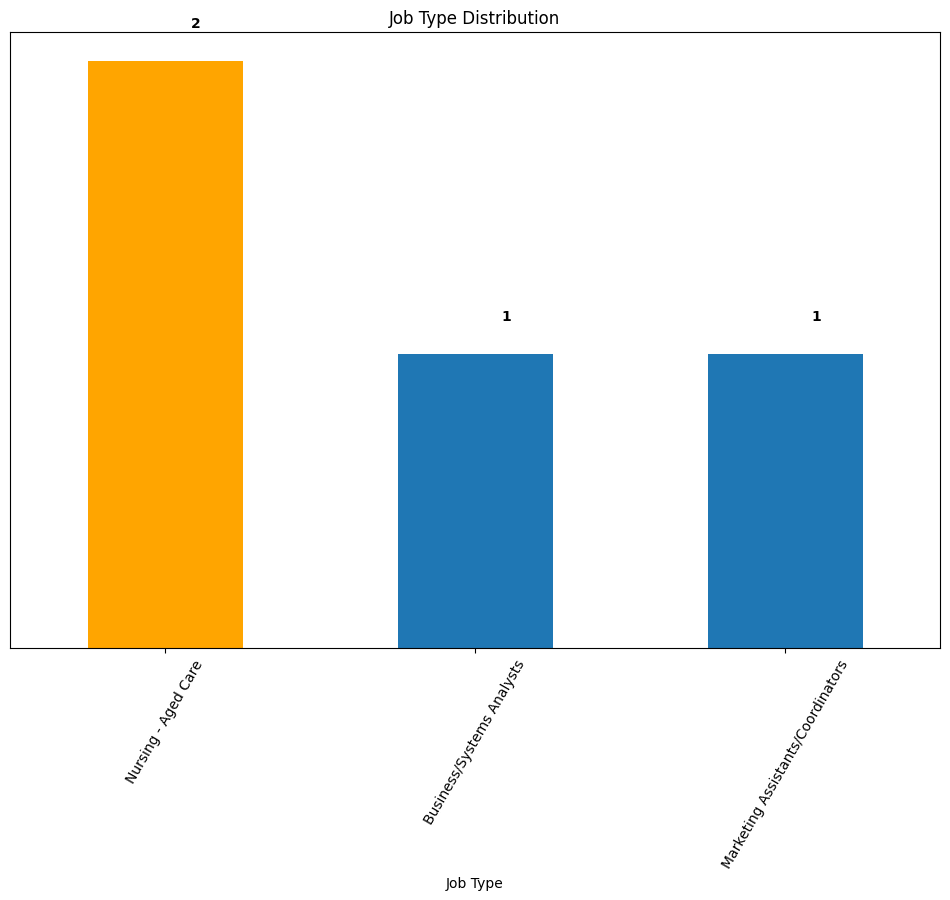

In [13]:
df_casual = df[df['Job Type'].str.contains('Casual/Vacation job',case=False, na=False)]

to_plot = df_casual.groupby('Classification').size().sort_values(ascending=False)

# Create a bar plot
ax = to_plot.plot(kind='bar', figsize=(12, 8))

# Highlight the maximum bar
max_value = to_plot.max()
max_index = to_plot.idxmax()

# Find the position (index) of the maximum value
max_pos = to_plot.argmax()

# Set the color of the maximum bar to a different color (e.g., 'orange')
ax.patches[max_pos].set_facecolor('orange')

# Add label just right of each bar
for i, value in enumerate(to_plot):
    ax.text(i + 0.1, value + 0.13, str(value), ha='center', va='center', color='black', fontweight='bold')

# Set labels for the x-axis and title
plt.xlabel('Job Type')
plt.title('Job Type Distribution')

# Remove y-axis
ax.yaxis.set_visible(False)

# Rotate the x-axis labels
plt.xticks(rotation=60)

# Show the plot
plt.show()

In [14]:
import re 
# Function to extract min and max salary, then calculate the average
def extract_and_average_salary(salary_str):
    # Match salary ranges for hourly and yearly formats
    hourly_pattern = r"\$(\d+(\.\d{1,2})?) – \$(\d+(\.\d{1,2})?) per hour"
    yearly_pattern = r"\$(\d{1,3}(?:,\d{3})*) – \$(\d{1,3}(?:,\d{3})*) per year"
    
    # Check for hourly salary format
    match_hourly = re.match(hourly_pattern, salary_str)
    if match_hourly:
        min_salary = float(match_hourly.group(1))
        max_salary = float(match_hourly.group(3))
        return (min_salary + max_salary) / 2
    
    # Check for yearly salary format
    match_yearly = re.match(yearly_pattern, salary_str)
    if match_yearly:
        min_salary = float(match_yearly.group(1).replace(",", ""))
        max_salary = float(match_yearly.group(2).replace(",", ""))
        return (min_salary + max_salary) / 2
    
    # Return None if the format doesn't match
    return None

# Apply the function to extract and calculate the average salary
df['Average Salary'] = df['Salary'].apply(extract_and_average_salary)

In [15]:
df.head()

,Job Title,Company Name,Classification,Job Type,Location,Job Highlights,Job Description,Salary,Posting Date,Reference,Average Salary
0,Observability Business Analyst,Talenza,Business/Systems Analysts,Contract/Temp job,Macquarie Park,"['6 Month Contract', '$950 per day including S...",Exciting Business Analyst opportunity to kick ...,$900 - $950 p.d. + Including Super,20m ago,https://www.seek.com.au/job/80881587?type=stan...,NaN
1,Human Resources Business Partner,MindChamps Early Learning & PreSchool,Consulting & Generalist HR,Full time job,Parramatta,['Join a movement transforming education and i...,"Join MindChamps to uplift global education, an...",Not Provided,38m ago,https://www.seek.com.au/job/80881017?type=stan...,NaN
2,"Office Manager (Data, Technology, Leader)",EXPHYS,Office Management,Full time job,Woolooware,['Commence January 2025 | Lead the Head Office...,Exciting office leadership role in a vibrant &...,"$85,000 – $105,000 per year",41m ago,https://www.seek.com.au/job/80881004?type=stan...,95000.0
3,Training and Consulting Services Administratio...,Full Stop Australia,Administrative Assistants,Full time job,Balmain,[],"Do you thrive on a culture of diversity, inclu...",Salary plus opt in salary packaging.,42m ago,https://www.seek.com.au/job/80880997?type=stan...,NaN
4,Senior HIM and Clinical Coding Lead,Beamtree Pty Ltd,Management,Full time job,North Sydney,[],The Senior HIM and Clinical Coding Lead will c...,Not Provided,43m ago,https://www.seek.com.au/job/80880978?type=stan...,NaN


/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_92348/1594989803.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_20_companies.index, x=top_20_companies.values, orient='h', palette='viridis')


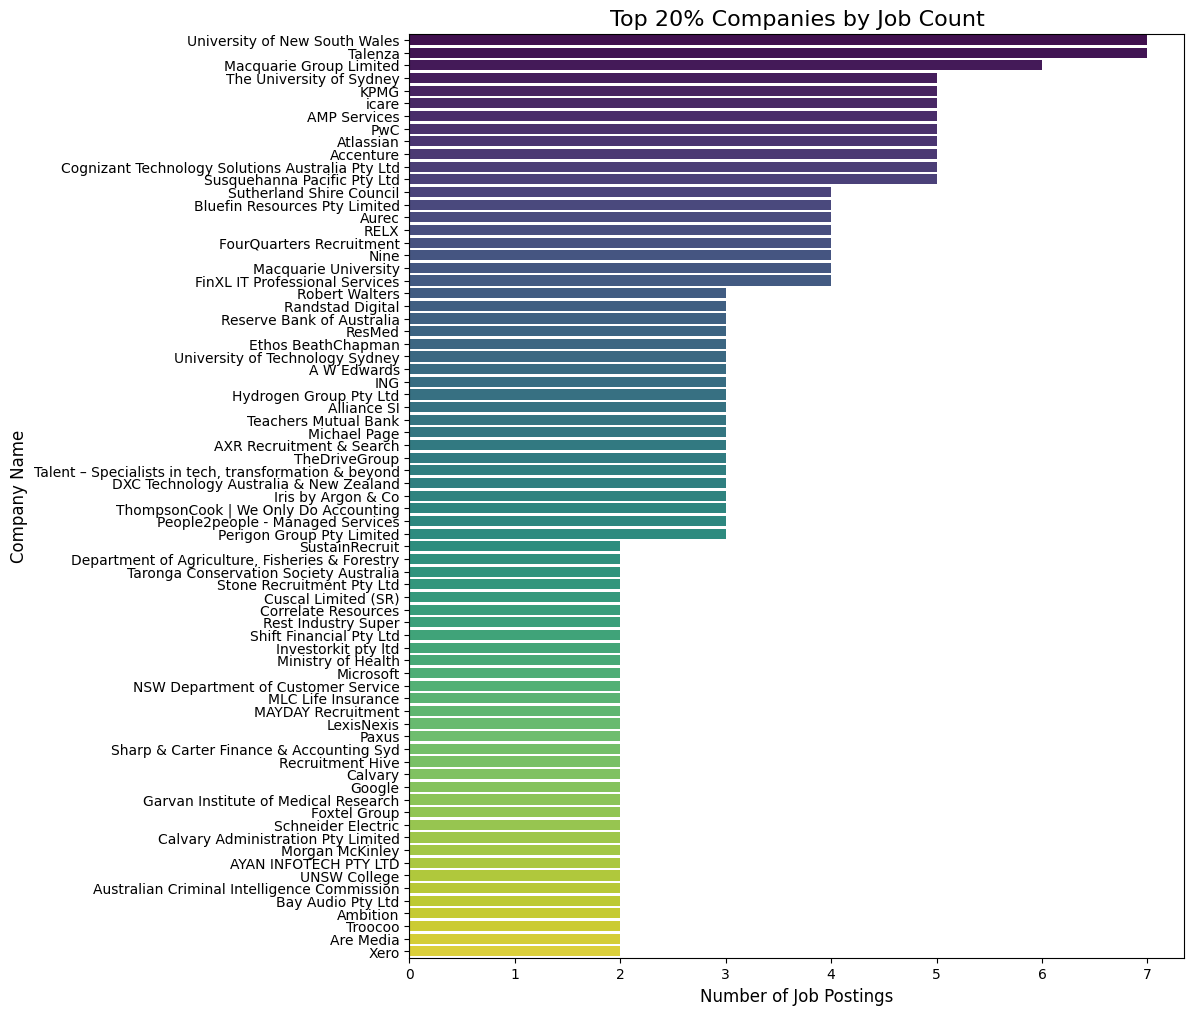

In [17]:
company_job_counts = df.groupby('Company Name').size().sort_values(ascending=False)

# Calculate the number of companies to include in the top 20%
top_20_percent_threshold = int(len(company_job_counts) * 0.20)

# Select the top 20% of companies based on job postings
top_20_companies = company_job_counts.head(top_20_percent_threshold)

# Plotting the top 20% companies with job postings as a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(y=top_20_companies.index, x=top_20_companies.values, orient='h', palette='viridis')

# Add titles and labels
plt.title('Top 20% Companies by Job Count', fontsize=16)
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Company Name', fontsize=12)

# Display the plot
plt.show()


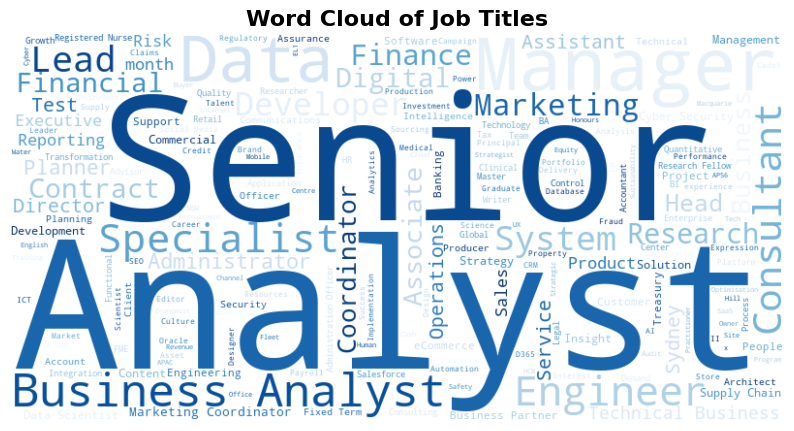

In [18]:
from wordcloud import WordCloud

# Concatenate all the job titles into a single string
text = " ".join(df['Job Title'].dropna()) 

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Word Cloud of Job Titles', fontsize=16, weight='bold')
plt.show()
